In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ls

Project Notebook.ipynb
README.md
catboost_info/
catboost_submission.csv
first_submission.csv
grid_search_submission.csv
important_features_submission.csv
sample_submission.csv
spaceshiptitanic_joemac_first_sub.ipynb
test.csv
train.csv


In [133]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [134]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [135]:
# Remove transported from feature cols
list(train_df.columns[1:])

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [136]:
# Getting features, and numeric versus categorical features
feature_cols = train_df.columns[1:]
discrete_variables  = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numeric_variables = ["Age","RoomService", "Spa", "FoodCourt", "ShoppingMall", "VRDeck"]
spend_cols = ["RoomService", "Spa", "FoodCourt", "ShoppingMall", "VRDeck"]

In [137]:
# Quick view of Transported by each variable
train_df.groupby('Transported').count()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,4315,4217,4204,4216,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4278,4286,4288,4274,4295,4279,4264,4287,4280,4277


In [138]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [139]:
# Checking Null Values
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [140]:
# I can't just drop the nulls broadly, because they are widespread and we lose a lot of records
train_df.count(), train_df.dropna().count()

(PassengerId     8693
 HomePlanet      8492
 CryoSleep       8476
 Cabin           8494
 Destination     8511
 Age             8514
 VIP             8490
 RoomService     8512
 FoodCourt       8510
 ShoppingMall    8485
 Spa             8510
 VRDeck          8505
 Name            8493
 Transported     8693
 dtype: int64,
 PassengerId     6606
 HomePlanet      6606
 CryoSleep       6606
 Cabin           6606
 Destination     6606
 Age             6606
 VIP             6606
 RoomService     6606
 FoodCourt       6606
 ShoppingMall    6606
 Spa             6606
 VRDeck          6606
 Name            6606
 Transported     6606
 dtype: int64)

In [141]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

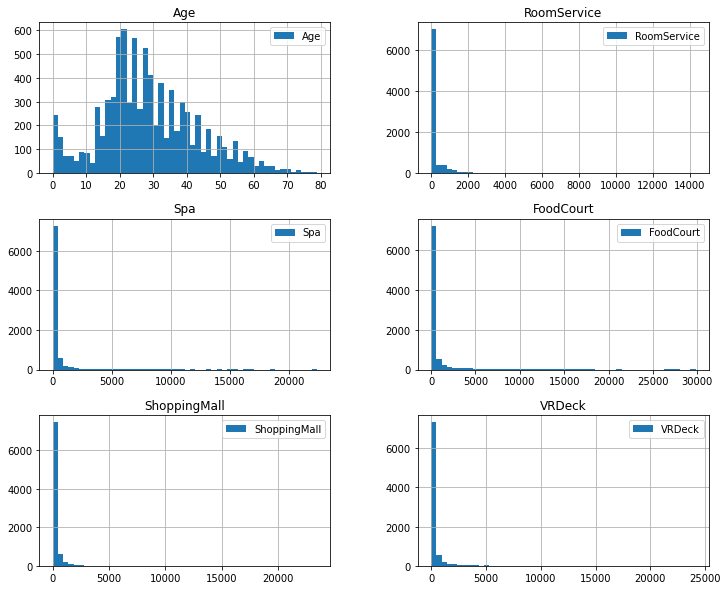

In [142]:
# Histograms for numeric variables - not normal
train_df[numeric_variables].hist(bins=50, figsize=(12, 10), legend=True)

plt.show()

In [143]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [146]:
train_df['total_spend'] = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [148]:
# Inspecting spend and age based on if someone is VIP or not
train_df.fillna(2.0).groupby('VIP').describe()['total_spend']

,count,mean,std,min,25%,50%,75%,max
VIP,,,,,,,,
False,8291.0,1371.504644,2683.701966,0.0,0.0,705.0,1369.0,35987.0
True,199.0,4425.477387,5121.300417,0.0,1281.0,2767.0,6120.5,31076.0
2.0,203.0,1347.960591,2796.306538,0.0,0.0,696.0,1253.5,19775.0


In [119]:
train_df['VIP'].isnull().sum()

203

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

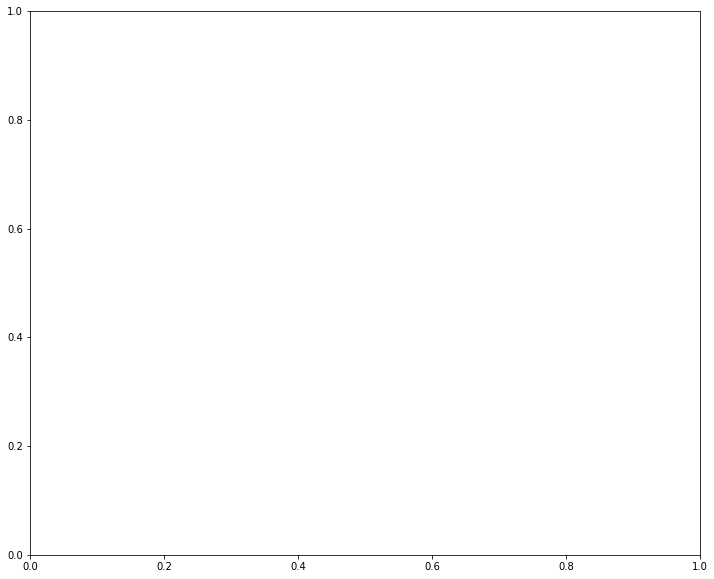

In [114]:
train_df['RoomService'].hist(bins=50, figsize=(12, 10), legend=True, color='VIP')

plt.show()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

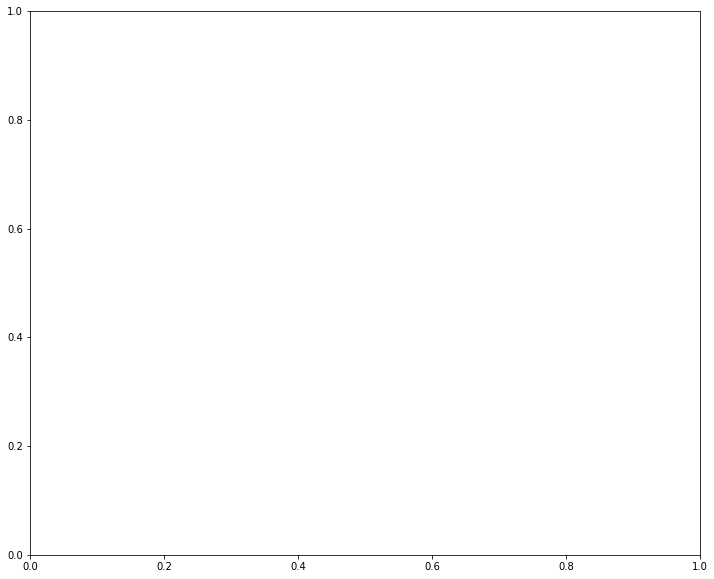

In [149]:
train_df['VIP'].hist(bins=50, figsize=(12, 10), legend=True)

In [12]:
# Checking unique values for discrete variables - Cabin is too unique
train_df[discrete_variables].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
dtype: int64

Text(0.5, 0, 'Age (years)')

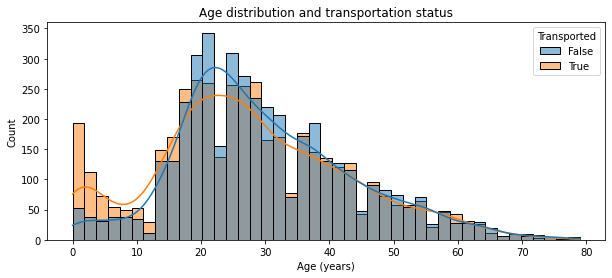

In [156]:
# Pretty similar distribution of transported versus not
plt.figure(figsize=(10,4))

sns.histplot(train_df, x=train_df["Age"], hue="Transported", kde=True)

# Aesthetics
plt.title("Age distribution and transportation status")
plt.xlabel("Age (years)")

<AxesSubplot:>

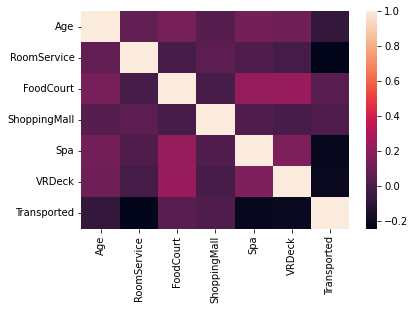

In [14]:
# Looking at data across all dimensions
corr = train_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0.5, 0, 'Count of Passengers')

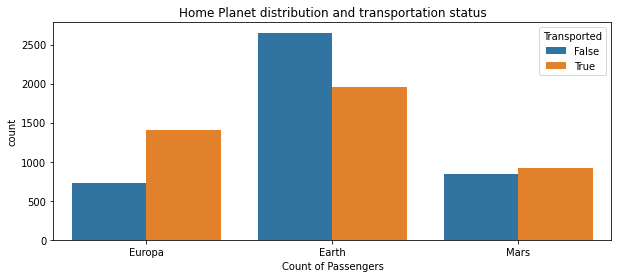

In [15]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="HomePlanet", hue="Transported")

# Aesthetics
plt.title("Home Planet distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

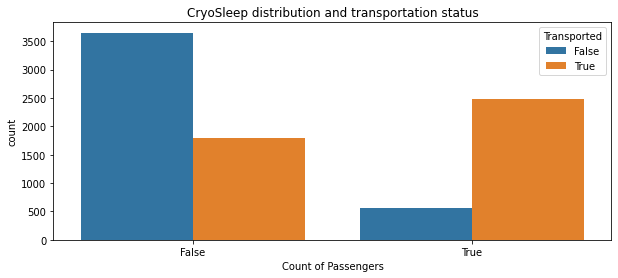

In [16]:
# Not a terrible signal...
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="CryoSleep", hue="Transported")

# Aesthetics
plt.title("CryoSleep distribution and transportation status")
plt.xlabel("Count of Passengers")

In [152]:
# Inspecting spend and age based on if someone is VIP or not
train_df.fillna(2.0).groupby('CryoSleep').describe()['total_spend']

,count,mean,std,min,25%,50%,75%,max
CryoSleep,,,,,,,,
False,5439.0,2248.299687,3245.061489,0.0,746.0,1019.0,2416.0,35987.0
True,3037.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2.0,217.0,1368.428571,2334.299597,0.0,0.0,703.0,1779.0,16350.0


In [154]:
train_df.Cabin.apply(lambda x:x.split("/"))

AttributeError: 'float' object has no attribute 'split'

In [153]:
train_df[train_df.CryoSleep==True].groupby()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_spend
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0.0
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0.0
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0.0
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True,0.0
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True,0.0
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True,0.0
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True,0.0


Text(0.5, 0, 'Count of Passengers')

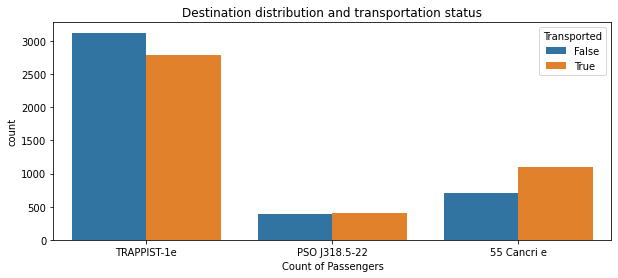

In [17]:
# Indifferent
plt.figure(figsize=(10,4))

sns.countplot(data=train_df, x="Destination", hue="Transported")

# Aesthetics
plt.title("Destination distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

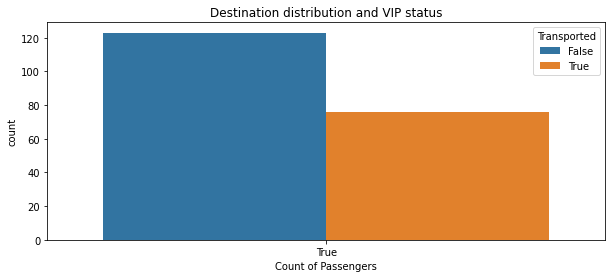

In [18]:
# Not enough people with VIP to matter
plt.figure(figsize=(10,4))

sns.countplot(data=train_df[train_df['VIP']==True], x="VIP", hue="Transported")

# Aesthetics
plt.title("Destination distribution and VIP status")
plt.xlabel("Count of Passengers")

In [19]:
discrete_variables.extend(['deck','number','side'])

In [20]:
discrete_variables

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'number', 'side']

In [21]:
def basic_prep(df,numeric_variables,spend_cols):
    df[['deck', 'number', 'side']] = pd.DataFrame(
        df.Cabin.apply(lambda x: str(x).split('/')).tolist(),
        index= df.index,
        columns=['deck', 'number', 'side'],
    )
#     df.drop('Name',axis=1,inplace=True)
    df.drop('Cabin',axis=1,inplace=True)
    df.number = df.number.astype(float)
    df[numeric_variables] = df[numeric_variables].fillna(df[numeric_variables].mean())
    df['total_spend'] = df[spend_cols].sum(axis=1)
    numeric_variables.append('total_spend')
    df[["CryoSleep", "VIP"]] = df[["CryoSleep", "VIP"]].replace({True: 1, False: 0}).astype(str)

    # Setting up error handling as test_df doesn't have "Transported"
    try:
        df["Transported"] = df["Transported"].replace({True: 1, False: 0})
    except:
        pass
    return df

In [22]:
train_df_cab = basic_prep(train_df,numeric_variables,spend_cols)

In [23]:
discrete_variables.extend(['deck','number','side'])

In [24]:
train_df_cab.side.unique()

array(['P', 'S', None], dtype=object)

In [25]:
# Can count familar members....need to finish
train_df_cab.Name.apply(lambda x: str(x).split(" ")[-1]).value_counts()

nan           200
Casonston      18
Oneiles        16
Litthews       15
Domington      15
             ... 
Danad           1
Iderinelay      1
Freptic         1
Clugnobse       1
Amspring        1
Name: Name, Length: 2218, dtype: int64

In [26]:
list(train_df_cab.Name)

['Maham Ofracculy',
 'Juanna Vines',
 'Altark Susent',
 'Solam Susent',
 'Willy Santantines',
 'Sandie Hinetthews',
 'Billex Jacostaffey',
 'Candra Jacostaffey',
 'Andona Beston',
 'Erraiam Flatic',
 'Altardr Flatic',
 'Wezena Flatic',
 'Berers Barne',
 'Reney Baketton',
 'Elle Bertsontry',
 'Justie Pooles',
 'Flats Eccle',
 'Carry Hughriend',
 'Alus Upead',
 'Lyde Brighttt',
 'Philda Brighttt',
 'Almary Brantuarez',
 'Glendy Brantuarez',
 'Mollen Mcfaddennon',
 'Breney Jacostanley',
 'Mael Brantuarez',
 'Terta Mcfaddennon',
 nan,
 'Penton Fullided',
 'Karard Brookenson',
 'Anyoni Unconary',
 'Ceros Mare',
 'Ginia Morsentley',
 'Coobix Datie',
 'Cinets Datie',
 'Dontch Datie',
 'Ziba Oingwhedly',
 'Luse Butte',
 'Marina Leodger',
 'Loise Wheelez',
 'Jorgie Batthewitt',
 'Margia Moodsey',
 'Ankalik Cylistrand',
 'Jodye Coopelandez',
 'Kayne Coopelandez',
 'Cassa Coopelandez',
 'Zelowl Chmad',
 'Mass Chmad',
 'Sony Lancis',
 'Vivia Johnshines',
 'Elaney Hubbarton',
 'Elson Hickerson',
 '

In [27]:
# It appears that passengers have a greater chance of being transported if their other family members are
train_df_cab.head(40)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,number,side,total_spend
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Maham Ofracculy,0,B,0.0,P,0.000000
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.000000,9.0,25.000000,549.0,44.000000,Juanna Vines,1,F,0.0,S,736.000000
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.000000,3576.0,0.000000,6715.0,49.000000,Altark Susent,0,A,0.0,S,10383.000000
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.000000,1283.0,371.000000,3329.0,193.000000,Solam Susent,0,A,0.0,S,5176.000000
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.000000,70.0,151.000000,565.0,2.000000,Willy Santantines,1,F,1.0,S,1091.000000
5,0005_01,Earth,0.0,PSO J318.5-22,44.0,0.0,0.000000,483.0,0.000000,291.0,0.000000,Sandie Hinetthews,1,F,0.0,P,774.000000
6,0006_01,Earth,0.0,TRAPPIST-1e,26.0,0.0,42.000000,1539.0,3.000000,0.0,0.000000,Billex Jacostaffey,1,F,2.0,S,1584.000000
7,0006_02,Earth,1.0,TRAPPIST-1e,28.0,0.0,0.000000,0.0,0.000000,0.0,304.854791,Candra Jacostaffey,1,G,0.0,S,304.854791
8,0007_01,Earth,0.0,TRAPPIST-1e,35.0,0.0,0.000000,785.0,17.000000,216.0,0.000000,Andona Beston,1,F,3.0,S,1018.000000
9,0008_01,Europa,1.0,55 Cancri e,14.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,Erraiam Flatic,1,B,1.0,P,0.000000


In [28]:
# Dropping name for now, as it is too unique to use
train_df_cab.drop('Name',axis=1,inplace=True)

Text(0.5, 0, 'Count of Passengers')

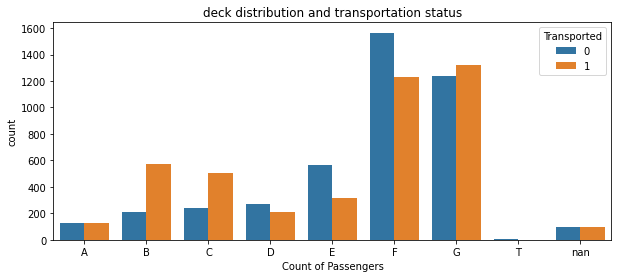

In [29]:
# Inspecting Cabin Feature Engineering....deck and cabin_type (made up names) could be good variables
plt.figure(figsize=(10,4))

sns.countplot(data=train_df_cab.sort_values(by='deck'), x="deck", hue="Transported")

# Aesthetics
plt.title("deck distribution and transportation status")
plt.xlabel("Count of Passengers")

Text(0.5, 0, 'Count of Passengers')

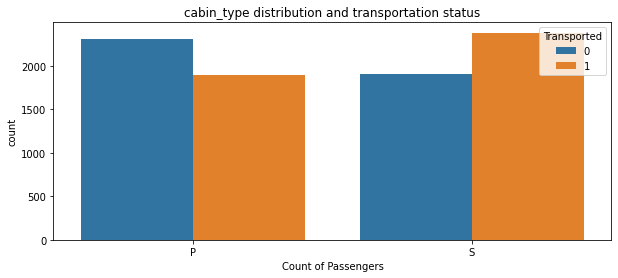

In [30]:
# Inspecting Cabin Feature Engineering....deck and cabin_type (made up names) could be good variables
plt.figure(figsize=(10,4))

sns.countplot(data=train_df_cab, x="side", hue="Transported")

# Aesthetics
plt.title("cabin_type distribution and transportation status")
plt.xlabel("Count of Passengers")

In [31]:
# Updating missing categorical variables....given the balance in missing and relatively low counts,
# I am going to fill based on mix of other values

def random_null_assignment(df):

    for variable in discrete_variables:
        # Getting MISSING indexes to fill with new values
        missing_indexes = (df[df[variable]=='nan'].index | df[df[variable].isna()].index)

        # Creating new array with counts for each non-missing value
        non_missing_values = df[df[variable]!='nan'].groupby(by=variable).count()['PassengerId']

        # Setting options to fill missing values with
        value_options = list(non_missing_values.index)

        # Setting probabilities for random function to assign values
        value_mix = [x/sum(non_missing_values.values) for x in non_missing_values.values]

        # Creating array of values to populate
        missing_values = np.random.choice(value_options,len(missing_indexes), p=value_mix)

        # Assign values based on index of missing values and new values array
        df.loc[missing_indexes,variable] = missing_values
    
    return df


In [32]:
train_df_cab = random_null_assignment(train_df_cab)

/Users/tylerdrumheller/Documents/Grad School/SIADS697/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  


In [33]:
train_df_cab['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [34]:
train_df_cab['deck'].unique()

array(['B', 'F', 'A', 'G', 'C', 'E', 'D', 'T'], dtype=object)

In [35]:
train_df_cab.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
number          0
side            0
total_spend     0
dtype: int64

In [36]:
discrete_variables

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'deck',
 'number',
 'side',
 'deck',
 'number',
 'side']

In [37]:
# Feature encoding - Given the lack of signal for most, I am only going to use CryoSleep, HomePlanet, Destination
# Scaling numerical variables
from sklearn.preprocessing import MinMaxScaler

def feature_transformation(df):

    cat_df = pd.get_dummies(train_df_cab[discrete_variables], drop_first=False)
    
    # define min max scaler
    scaler = MinMaxScaler()
    # transform data
    num_df = pd.DataFrame(scaler.fit_transform(train_df_cab[numeric_variables]),columns=numeric_variables)
    
    final_df = pd.merge(cat_df,num_df,left_index=True,right_index=True)
    
    return final_df

In [38]:
final_feature_df = feature_transformation(train_df_cab)

final_feature_df.head()

,number,number,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,deck_T,side_P,side_S,Age,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck,total_spend
0,0.0,0.0,0,1,0,1,0,0,0,1,...,0,1,0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,1,0,0,1,0,0,0,1,...,0,0,1,0.303797,0.007608,0.024500,0.000302,0.001064,0.001823,0.020452
2,0.0,0.0,0,1,0,1,0,0,0,1,...,0,0,1,0.734177,0.003001,0.299670,0.119948,0.000000,0.002030,0.288521
3,0.0,0.0,0,1,0,1,0,0,0,1,...,0,0,1,0.417722,0.000000,0.148563,0.043035,0.015793,0.007997,0.143830
4,1.0,1.0,1,0,0,1,0,0,0,1,...,0,0,1,0.202532,0.021149,0.025214,0.002348,0.006428,0.000083,0.030317


In [39]:
list(final_feature_df.columns)

['number',
 'number',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_0.0',
 'CryoSleep_1.0',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_0.0',
 'VIP_1.0',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_T',
 'side_P',
 'side_S',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'deck_T',
 'side_P',
 'side_S',
 'Age',
 'RoomService',
 'Spa',
 'FoodCourt',
 'ShoppingMall',
 'VRDeck',
 'total_spend']

In [40]:
len(final_feature_df.columns)

39

In [41]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 5)

X_train, X_test, y_train, y_test = train_test_split(final_feature_df, train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [42]:
# performing predictions on the train dataset
y_pred = clf.predict(X_train)

# metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))


ACCURACY OF THE MODEL:  0.9731090020132298


In [43]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.7567567567567568


In [44]:
# refitting model with all train data
clf.fit(final_feature_df, train_df.Transported)

RandomForestClassifier(n_estimators=5)

In [45]:
spend_cols

['RoomService', 'Spa', 'FoodCourt', 'ShoppingMall', 'VRDeck']

In [46]:
# Setting up test_df for submission

# Adding new cabin fields to test_df
test_df_cab = basic_prep(test_df,numeric_variables[:-1],spend_cols)

test_df_cab = random_null_assignment(test_df_cab)

final_test_feature_df = feature_transformation(test_df_cab)

final_test_feature_df.head()


/Users/tylerdrumheller/Documents/Grad School/SIADS697/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  


,number,number,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,deck_T,side_P,side_S,Age,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck,total_spend
0,0.0,0.0,0,1,0,1,0,0,0,1,...,0,1,0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,1,0,0,1,0,0,0,1,...,0,0,1,0.303797,0.007608,0.024500,0.000302,0.001064,0.001823,0.020452
2,0.0,0.0,0,1,0,1,0,0,0,1,...,0,0,1,0.734177,0.003001,0.299670,0.119948,0.000000,0.002030,0.288521
3,0.0,0.0,0,1,0,1,0,0,0,1,...,0,0,1,0.417722,0.000000,0.148563,0.043035,0.015793,0.007997,0.143830
4,1.0,1.0,1,0,0,1,0,0,0,1,...,0,0,1,0.202532,0.021149,0.025214,0.002348,0.006428,0.000083,0.030317


In [47]:
test_df['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [48]:
y_sub = clf.predict(final_test_feature_df)

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('first_submission.csv',index=False)

### To Do
3. Remove un-important features
4. Gridsearch/optimization
5. Make a pipeline?
6. Compute missing values using a machine learning method
7. Try different model types

## Looking at feature importance and reducing features

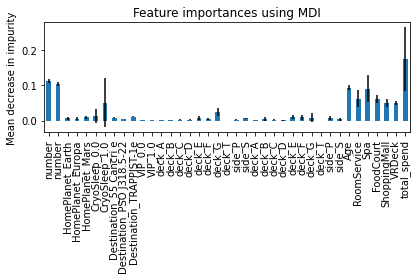

In [49]:
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=final_test_feature_df.columns)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [50]:
important_features = ['Age','RoomService','Spa','FoodCourt','ShoppingMall','VRDeck'] # Adding Cryosleep makes the result worse

X_train, X_test, y_train, y_test = train_test_split(final_feature_df[important_features], train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.777458309373203


In [51]:
# Reducing features and resubmitting
y_sub = clf.predict(final_test_feature_df[important_features])

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('important_features_submission.csv',index=False)

# Score: 0.49988

In [52]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Applying Grid Search

In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':(500,1000), 'max_depth':[5,10],'criterion':['gini','entropy','log_loss'],
                         'min_samples_split':[12,25,50]}
algo = RandomForestClassifier()

clf_gs = GridSearchCV(algo, parameters,verbose=3)

clf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500;, score=0.774 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500;, score=0.787 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500;, score=0.787 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500;, score=0.796 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=500;, score=0.779 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000;, score=0.773 total time=   3.3s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000;, score=0.787 total time=   3.4s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=12, n_estimators=1000;, score=0.786 total time=   3.3s
[CV 4/5] END criterion=

KeyboardInterrupt: 

In [54]:
clf_gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [49]:
clf_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 50,
 'n_estimators': 500}

In [55]:
clf = RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=50,n_estimators = 500)

X_train, X_test, y_train, y_test = train_test_split(final_feature_df, train_df.Transported, test_size=0.2)

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8021851638872916


In [56]:
# Re-training model with all train data
clf.fit(final_feature_df,train_df.Transported)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=50,
                       n_estimators=500)

In [83]:
y_sub = pd.Series(y_sub).replace({1:'True',0:'False'}).values

In [84]:
pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [85]:
y_sub = clf.predict(final_test_feature_df)
y_sub = pd.Series(y_sub).replace({1:'True',0:'False'}).values

pd.merge(test_df['PassengerId'],pd.DataFrame(y_sub,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('grid_search_submission.csv',index=False)

In [66]:
# Using Catboost Algo

In [87]:
from catboost import CatBoostClassifier, Pool

ModuleNotFoundError: No module named 'catboost'

In [336]:
model = CatBoostClassifier(verbose=True)

In [351]:
train_df_cab.dtypes==object

PassengerId      True
HomePlanet       True
CryoSleep        True
Destination      True
Age             False
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
deck             True
number          False
side             True
total_spend     False
dtype: bool

In [59]:
discrete_variables+numeric_variables

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'deck',
 'number',
 'side',
 'deck',
 'number',
 'side',
 'Age',
 'RoomService',
 'Spa',
 'FoodCourt',
 'ShoppingMall',
 'VRDeck',
 'total_spend']

In [338]:
# Add cat_features to fit
model.fit(train_df_cab.drop(['PassengerId','Transported'],axis=1),train_df.Transported)


CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="Europa": Cannot convert 'b'Europa'' to float

In [86]:
preds_class = model.predict(final_test_feature_df)
preds_class

array(['True', 'False', 'True', ..., 'True', 'False', 'True'],
      dtype=object)

In [87]:
pd.merge(test_df['PassengerId'],pd.DataFrame(preds_class,columns=['Transported']),left_index=True,right_index=True)\
            .to_csv('catboost_submission.csv',index=False)

In [90]:
train_df.Transported.replace()

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [93]:
final_feature_df[['CryoSleep','VIP']] = final_feature_df[['CryoSleep','VIP']].replace({True:1,False:0})

In [101]:
parameters = {'iterations':(2,5,10), 'depth':[2,5,10,20],'learning_rate':[.25,.5,1]}
algo = CatBoostClassifier()

model_gs = GridSearchCV(algo,parameters,verbose=True)

model_gs.fit(final_feature_df,train_df.Transported)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6333942	total: 2.81ms	remaining: 2.81ms
1:	learn: 0.5928814	total: 4.31ms	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CatBoostError: predicted classes have string type but specified y is boolean